- Data processing are  presented on Jupyter to better intrercat wiht. 

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error, auc, accuracy_score, confusion_matrix, mean_squared_error

In [262]:

pd.options.display.max_rows =10
pd.options.display.max_columns = 500
pd.set_option.display_width=1000

df=pd.read_excel('data/GD6.xlsx', index_col=None, header=0)

In [263]:
df.tail()

,CPR_NO,NAME,ENAME,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
24185,70304602,هزاع أحمد يوسف الكعبي,HAZZA AHMED YUSUF ALKAABI,مدرسة وادي السيل الابتدائية الاعدادية للبنين,المحافظة الجنوبية,الرياضيات,مدرسين,30.0,28.0,20.0,18.0,47.0,42.0,97.0,88,93,61.9,94.636364
24186,71007423,يوسف سعيد عمير السليمان,YOUSIF SAEED OMAIR ALSULAIMAN,مدرسة وادي السيل الابتدائية الاعدادية للبنين,المحافظة الجنوبية,الرياضيات,مدرسين,30.0,25.0,17.0,15.0,17.0,14.5,64.0,55,60,44.5,85.181818
24187,70402183,يوسف عبدالمنعم علي حسين,YOUSIF ABDULMUNEM ALI HUSAIN,مدرسة وادي السيل الابتدائية الاعدادية للبنين,المحافظة الجنوبية,الرياضيات,مدرسين,26.0,27.0,12.0,17.0,24.0,22.0,62.0,66,64,44.5,82.727273
24188,70803196,يوسف محمد عبدالله المناعي,YOUSIF MOHAMED ABDULLA ALMANNAEI,مدرسة وادي السيل الابتدائية الاعدادية للبنين,المحافظة الجنوبية,الرياضيات,مدرسين,28.0,28.0,18.0,18.0,37.0,23.5,83.0,70,77,46.3,89.181818
24189,70211361,يوسف مصطفى محمد عبدالله,YOUSIF MUSTAFA MOHAMMED ABDULLA,مدرسة وادي السيل الابتدائية الاعدادية للبنين,المحافظة الجنوبية,الرياضيات,مدرسين,29.0,27.0,14.0,16.0,16.0,19.5,59.0,63,61,39.0,81.818182


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24190 entries, 0 to 24189
Data columns (total 18 columns):
CPR_NO            24190 non-null int64
NAME              24190 non-null object
ENAME             24190 non-null object
SCH_NM            24190 non-null object
PROV_NM           24190 non-null object
SUBM              24190 non-null object
Teacher_Gender    24190 non-null object
ACHIEVEMENTS1     24172 non-null float64
ACHIEVEMENTS2     24190 non-null float64
MIDTERM1          24172 non-null float64
MIDTERM2          24190 non-null float64
FINAL1            24174 non-null float64
FINAL2            24190 non-null float64
TOTAL1            24174 non-null float64
TOTAL2            24190 non-null int64
D_MARK            24190 non-null int64
NAT_MARK          24190 non-null float64
GPA               24190 non-null float64
dtypes: float64(9), int64(3), object(6)
memory usage: 3.3+ MB


In [265]:
df.keys()

Index(['CPR_NO', 'NAME', 'ENAME', 'SCH_NM', 'PROV_NM', 'SUBM',
       'Teacher_Gender', 'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1',
       'MIDTERM2', 'FINAL1', 'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK',
       'NAT_MARK', 'GPA'],
      dtype='object')

In [266]:
df.shape

(24190, 18)

In [267]:
df=df.drop(['NAME', 'ENAME'], axis=1)

In [268]:
df.head()

,CPR_NO,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
0,70913390,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9
1,71105956,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5
2,70712190,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2
3,70207496,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9
4,70507953,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2


In [132]:
df.dtypes

CPR_NO              int64
SCH_NM             object
PROV_NM            object
SUBM               object
Teacher_Gender     object
                   ...   
TOTAL1            float64
TOTAL2              int64
D_MARK              int64
NAT_MARK          float64
GPA               float64
Length: 16, dtype: object

In [269]:
subj=["العلوم","الرياضيات"]
df[df.SUBM.isin(subj)].head()

,CPR_NO,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
0,70913390,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9
1,71105956,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5
2,70712190,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2
3,70207496,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9
4,70507953,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2


In [270]:
df.SUBM.unique()

array(['العلوم', 'الرياضيات'], dtype=object)

In [271]:
df.PROV_NM.unique()

array(['محافظة العاصمة', 'المحافظة الشمالية', 'المحافظة الجنوبية',
       'محافظة المحرق'], dtype=object)

In [272]:
df.PROV_NM = df["PROV_NM"].map({'المحافظة الجنوبية':'South', 'المحافظة الشمالية':'North',\
                                'محافظة العاصمة': 'Cap',  \
                                'محافظة المحرق':'Muharaq'})

In [273]:
df.head()

,CPR_NO,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
0,70913390,المعهد الديني الجعفري,Cap,العلوم,مدرسين,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9
1,71105956,المعهد الديني الجعفري,Cap,العلوم,مدرسين,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5
2,70712190,المعهد الديني الجعفري,Cap,العلوم,مدرسين,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2
3,70207496,المعهد الديني الجعفري,Cap,العلوم,مدرسين,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9
4,70507953,المعهد الديني الجعفري,Cap,العلوم,مدرسين,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2


In [274]:
df.SUBM = df["SUBM"].map({'العلوم':'Science',   
                          'الرياضيات':'Math'})

In [275]:
df.head()

,CPR_NO,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
0,70913390,المعهد الديني الجعفري,Cap,Science,مدرسين,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9
1,71105956,المعهد الديني الجعفري,Cap,Science,مدرسين,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5
2,70712190,المعهد الديني الجعفري,Cap,Science,مدرسين,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2
3,70207496,المعهد الديني الجعفري,Cap,Science,مدرسين,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9
4,70507953,المعهد الديني الجعفري,Cap,Science,مدرسين,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2


In [276]:
df.Teacher_Gender = df["Teacher_Gender"].map({'مدرسات':'F', 'مدرسين':'M'})

In [277]:
df.head()

,CPR_NO,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
0,70913390,المعهد الديني الجعفري,Cap,Science,M,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9
1,71105956,المعهد الديني الجعفري,Cap,Science,M,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5
2,70712190,المعهد الديني الجعفري,Cap,Science,M,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2
3,70207496,المعهد الديني الجعفري,Cap,Science,M,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9
4,70507953,المعهد الديني الجعفري,Cap,Science,M,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2


In [278]:
df.shape

(24190, 16)

In [279]:
data_column_category = df.select_dtypes(exclude=[np.number]).columns

In [280]:
data_column_category

Index(['SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender'], dtype='object')

In [281]:
df.to_csv("GD6_clean.csv")

In [282]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()

# for i in data_column_category:

#     df[i] = label_encoder.fit_transform(df[i])

# print("Label Encoded Data: ")

# df.head()

In [283]:
df.iloc[:,1:].describe()

,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
count,24172.000000,24190.000000,24172.000000,24190.000000,24174.00000,24190.000000,24174.000000,24190.000000,24190.000000,24190.000000,24190.000000
mean,28.013205,28.226147,16.396359,16.233038,37.58565,35.387970,82.145321,80.090492,81.366226,51.163878,89.781241
std,2.516684,2.404484,3.691991,3.738233,10.61787,8.338934,15.120198,12.775070,13.360015,10.752687,6.986924
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,27.000000,14.500000,14.000000,31.00000,30.500000,73.000000,72.000000,73.000000,44.200000,86.090909
50%,29.000000,29.000000,17.500000,17.000000,40.00000,37.000000,86.000000,83.000000,84.000000,51.300000,91.090909
75%,30.000000,30.000000,19.000000,19.000000,46.00000,42.000000,94.000000,90.000000,92.000000,58.300000,95.000000
max,30.000000,30.000000,20.000000,20.000000,94.00000,94.000000,100.000000,100.000000,100.000000,90.000000,99.818182


In [284]:
df.keys()

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

In [285]:
#sns.pairplot(df,hue = 'PROV_NM',diag_kind = "kde",kind = "scatter",palette = "husl")


In [286]:
df["PROV_NM"].value_counts()

North      8246
South      5936
Muharaq    5046
Cap        4962
Name: PROV_NM, dtype: int64

In [287]:
cols = ['PROV_NM',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA']


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

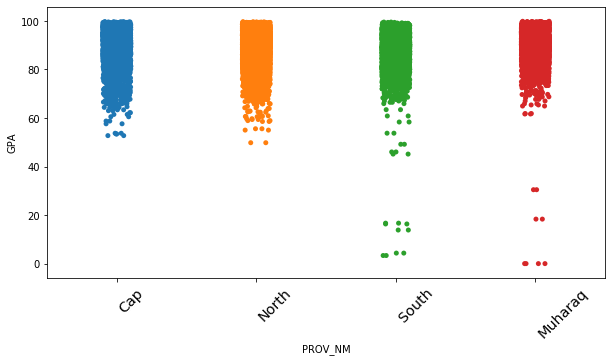

In [149]:
plt.figure(figsize=(10,5))
a= sns.stripplot(y = "GPA", x = "PROV_NM", data = df)
plt.xticks(
    rotation=45, 
    horizontalalignment='left',
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

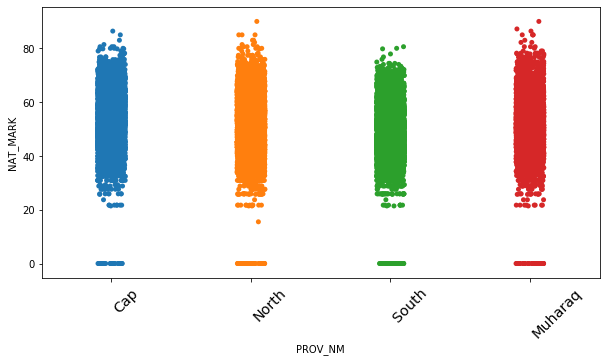

In [288]:
plt.figure(figsize=(10,5))
a= sns.stripplot(y = "NAT_MARK", x = "PROV_NM", data = df)
plt.xticks(
    rotation=45, 
    horizontalalignment='left',
    fontweight='light',
    fontsize='x-large'  
)

## for i in df.PROV_NM.unique():
sns.distplot(df.D_MARK[df.PROV_NM==i],
                 kde=1,label='{}'.format(i))

plt.legend()

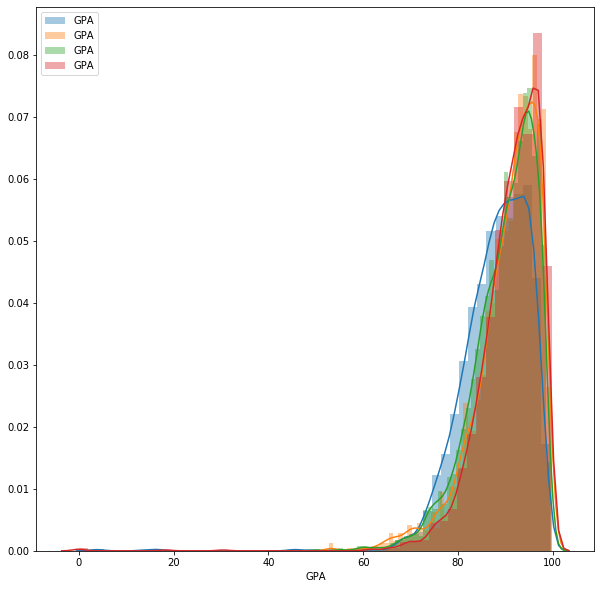

In [289]:
plt.figure(figsize=(10,10))
# for i in df.PROV_NM.unique():
sns.distplot(df.GPA[df.PROV_NM=="South"],         kde=1,label='{}'.format(i))


sns.distplot(df.GPA[df.PROV_NM=="Cap"],         kde=1,label='{}'.format(i))
sns.distplot(df.GPA[df.PROV_NM=="North"],         kde=1,label='{}'.format(i))


sns.distplot(df.GPA[df.PROV_NM=="Muharaq"],         kde=1,label='{}'.format(i))


plt.legend()

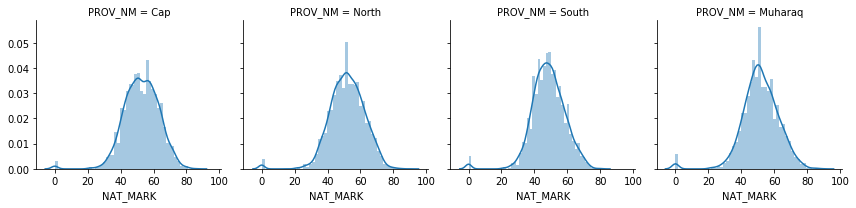

In [295]:
g=sns.FacetGrid(df, col="PROV_NM")
g.map(sns.distplot,"NAT_MARK", bins=50 )

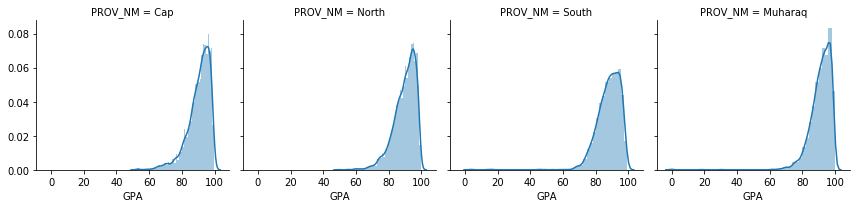

In [293]:
g=sns.FacetGrid(df, col="PROV_NM")
g.map(sns.distplot,"GPA" )

 plot 4. grpahs, each for A province.   draw average and the mean adn The mode .   observe their order and look if the mean is far less or more than the average.  
 if data was for a prduct to sale, we could say that those item are over or under priced
 

In [ ]:
from scipy.stats import shapiro

shap_w, shap_p = shapiro(df['GPA'])
shap_p

std_scaler=StandardScaler(copy=True, with_mean=True, with_std=True)

scaled_Arry=std_scaler.fit_transform(df.iloc[:,5:])

scaled_df=pd.DataFrame(scaled_Arry, columns=df.columns)

scaled_df.head()

In [ ]:
scaled_df.head()

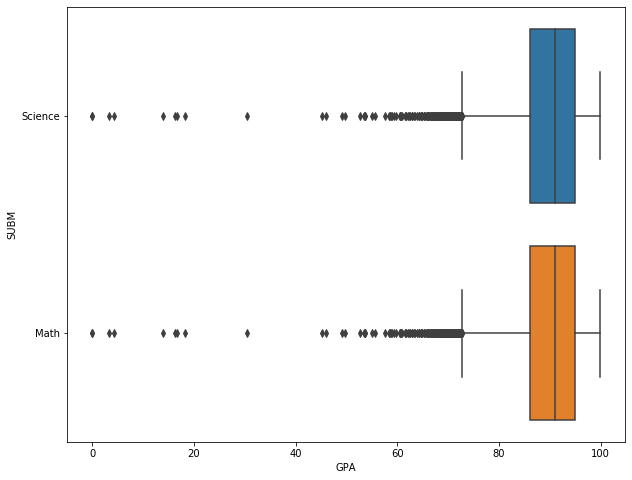

In [180]:
fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(df["GPA"], df.SUBM, data=df)

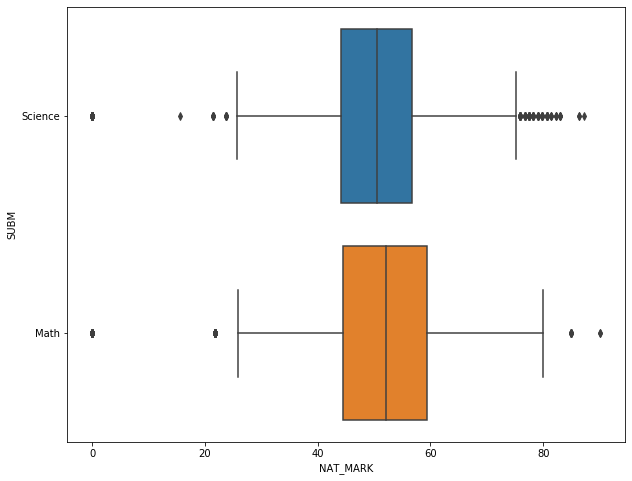

In [294]:
fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(df["NAT_MARK"], df.SUBM, data=df)

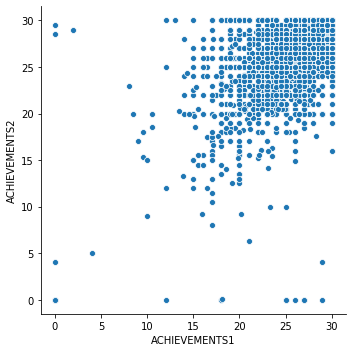

In [116]:
# tracking correlatin between both Achievements
sns.relplot(x="ACHIEVEMENTS1", y="ACHIEVEMENTS2", data=df)

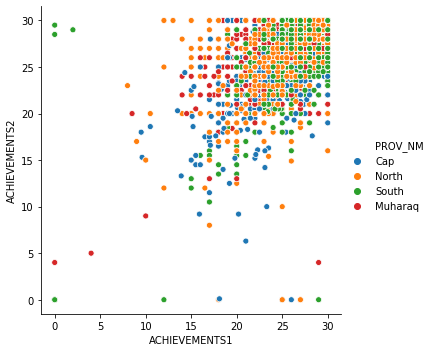

In [181]:
sns.relplot(x="ACHIEVEMENTS1", y="ACHIEVEMENTS2", data=df, hue="PROV_NM")
plt.show()

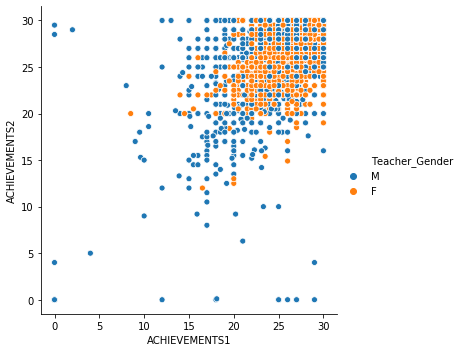

In [184]:
sns.relplot(x="ACHIEVEMENTS1", y="ACHIEVEMENTS2", data=df, hue="Teacher_Gender")

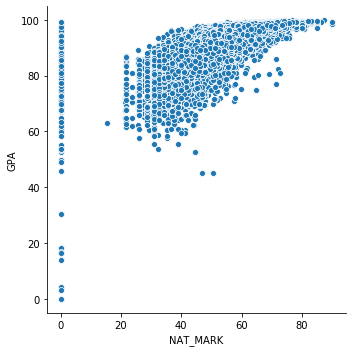

In [183]:
sns.relplot(x="NAT_MARK", y="GPA", data=df)

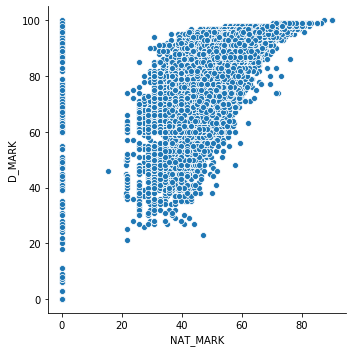

In [189]:
sns.relplot(x="NAT_MARK", y="D_MARK", data=df)

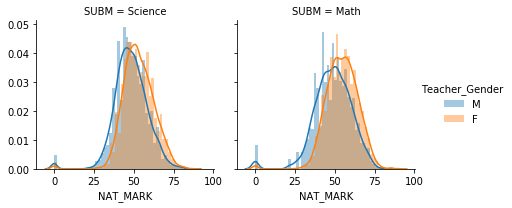

In [297]:
g=sns.FacetGrid(df, col="SUBM", hue="Teacher_Gender")
g.map(sns.distplot, "NAT_MARK", bins=50)
g.add_legend()

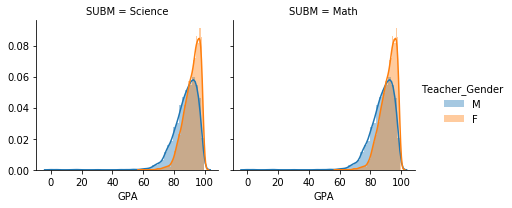

In [298]:
g=sns.FacetGrid(df, col="SUBM", hue="Teacher_Gender")
g.map(sns.distplot, "GPA", bins=50)
g.add_legend()

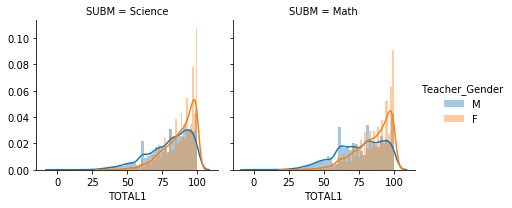

In [299]:
g=sns.FacetGrid(df, col="SUBM", hue="Teacher_Gender")
g.map(sns.distplot, "TOTAL1", bins=50)
g.add_legend()

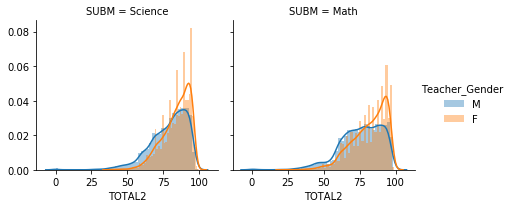

In [300]:
g=sns.FacetGrid(df, col="SUBM", hue="Teacher_Gender")
g.map(sns.distplot, "TOTAL2", bins=50)
g.add_legend()

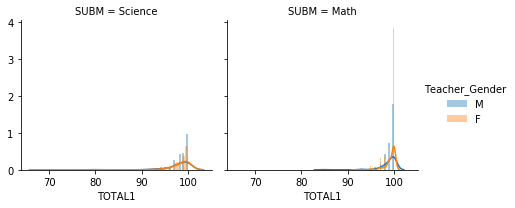

In [312]:
A=df[df.NAT_MARK>70]
g=sns.FacetGrid(A, col="SUBM", hue="Teacher_Gender")
g.map(sns.distplot, "TOTAL1", bins=50)
g.add_legend()

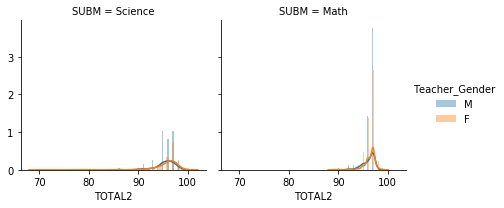

In [313]:
g=sns.FacetGrid(A, col="SUBM", hue="Teacher_Gender")
g.map(sns.distplot, "TOTAL2", bins=50)
g.add_legend()

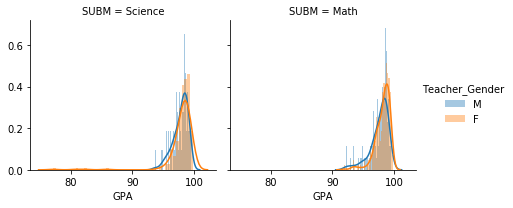

In [314]:
g=sns.FacetGrid(A, col="SUBM", hue="Teacher_Gender")
g.map(sns.distplot, "GPA", bins=50)
g.add_legend()

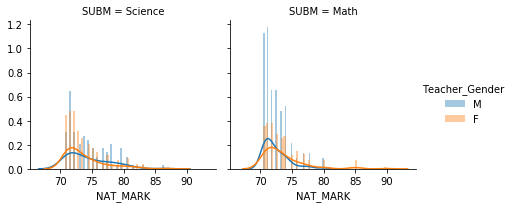

In [317]:
g=sns.FacetGrid(A, col="SUBM", hue="Teacher_Gender")
g.map(sns.distplot, "NAT_MARK", bins=50)
g.add_legend()

In [324]:
df.PROV_NM.value_counts().index

Index(['North', 'South', 'Muharaq', 'Cap'], dtype='object')

In [329]:
df[df.GPA>75].SUBM.count()

23406

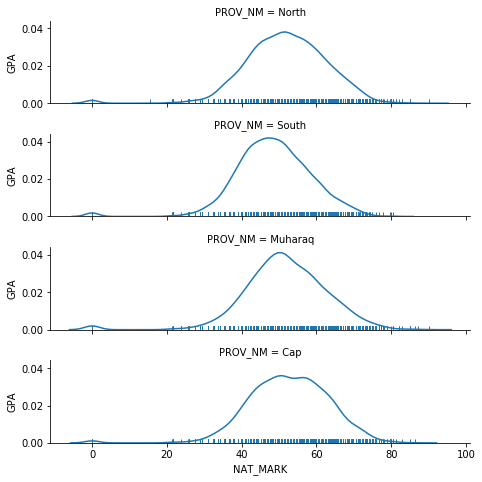

In [338]:
province=df.PROV_NM.value_counts().index
g=sns.FacetGrid(df, row="PROV_NM",row_order=province,  height=1.7,  aspect=4)
g.map(sns.distplot, "NAT_MARK", "GPA", hist=False, rug=True)

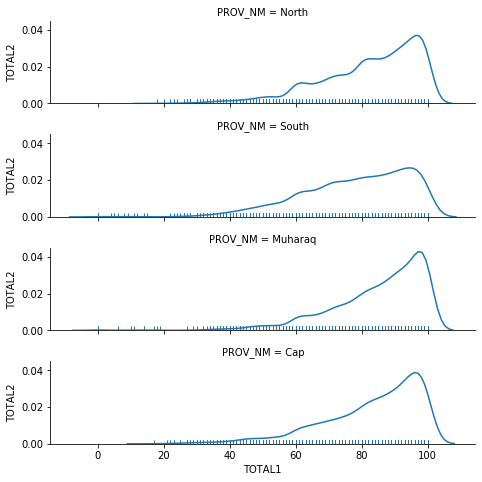

In [351]:
province=df.PROV_NM.value_counts().index
g=sns.FacetGrid(df, row="PROV_NM",row_order=province,  height=1.7,  aspect=4)
g.map(sns.distplot, "TOTAL1", "TOTAL2", hist=False, rug=True)
plt.show()

In [ ]:
g=sns.FacetGrid(df, hue="PROV_NM",palette="Set1",  height=5,  hue_kws={"marker":["^", "v"]})
g.map(plt.scatter, "NAT_MARK", "GPA", s=100, linewidh=.5, edgecolor="white")
g.add_legend();

In [339]:
df.keys()

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

In [185]:
df.keys()

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

In [76]:
df["ACHIEVEMENTS1"].isnull().sum()

df.isnull().sum()

18

In [68]:
# df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
#                    "toy": [np.nan, 'Batmobile', 'Bullwhip'],
#                    "born": [pd.NaT, pd.Timestamp("1940-04-25"),
#                             pd.NaT]})
# print(df)
# df.dropna()

In [162]:

for i in df:
    sum(pd.isnull(df[i]))

In [250]:
 %%timeit
 df.isnull().any().any()

5.19 ms ± 209 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [164]:
df.shape

(24190, 16)

In [165]:
df.dropna()

,CPR_NO,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
0,70913390,المعهد الديني الجعفري,Cap,Science,M,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.900000
1,71105956,المعهد الديني الجعفري,Cap,Science,M,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.500000
2,70712190,المعهد الديني الجعفري,Cap,Science,M,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.200000
3,70207496,المعهد الديني الجعفري,Cap,Science,M,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.900000
4,70507953,المعهد الديني الجعفري,Cap,Science,M,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24185,70304602,مدرسة وادي السيل الابتدائية الاعدادية للبنين,South,Math,M,30.0,28.0,20.0,18.0,47.0,42.0,97.0,88,93,61.9,94.636364
24186,71007423,مدرسة وادي السيل الابتدائية الاعدادية للبنين,South,Math,M,30.0,25.0,17.0,15.0,17.0,14.5,64.0,55,60,44.5,85.181818
24187,70402183,مدرسة وادي السيل الابتدائية الاعدادية للبنين,South,Math,M,26.0,27.0,12.0,17.0,24.0,22.0,62.0,66,64,44.5,82.727273
24188,70803196,مدرسة وادي السيل الابتدائية الاعدادية للبنين,South,Math,M,28.0,28.0,18.0,18.0,37.0,23.5,83.0,70,77,46.3,89.181818


In [166]:
df.shape

(24190, 16)

In [167]:
df=df.dropna()

df[df.isnull().any(axis=1)]

df.isnull().sum(axis=0)

df.ACHIEVEMENTS1.isnull().sum()

0

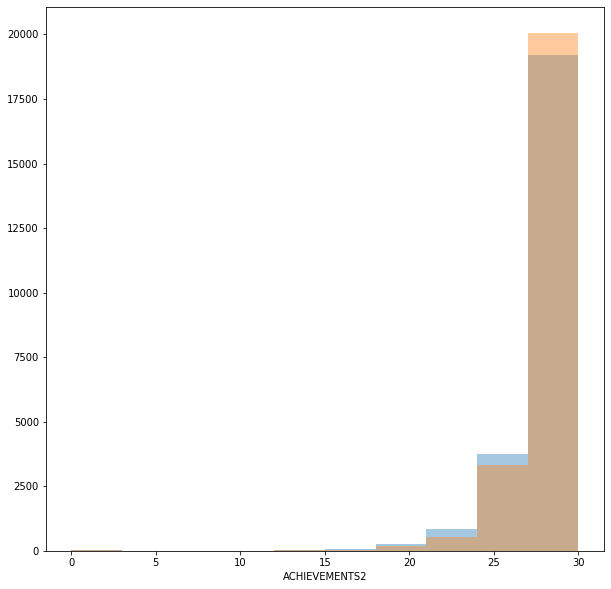

In [354]:

sns.distplot(df["ACHIEVEMENTS1"], kde=False, bins=10)
sns.distplot(df["ACHIEVEMENTS2"], kde=False, bins=10)

plt.show()
# it looks like a copy and Paste game. 
# change bins from 20 to 50 to even more and lok at the trend which is wierdrly copied

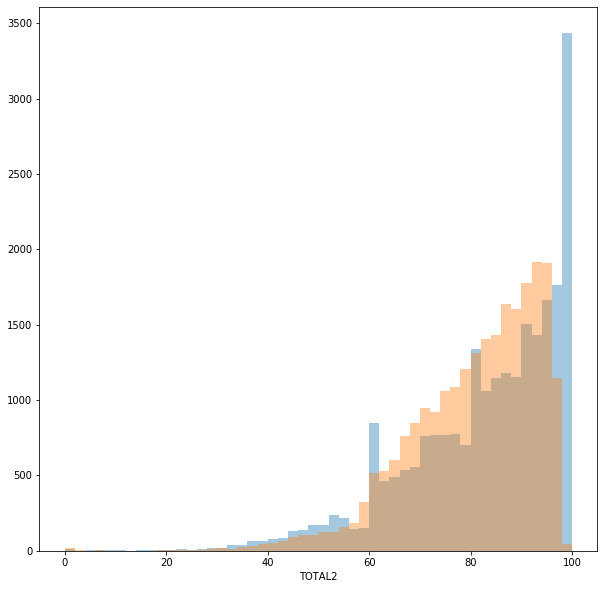

In [193]:
sns.distplot(df["TOTAL1"], kde=False, bins=50)
sns.distplot(df["TOTAL2"], kde=False, bins=50)

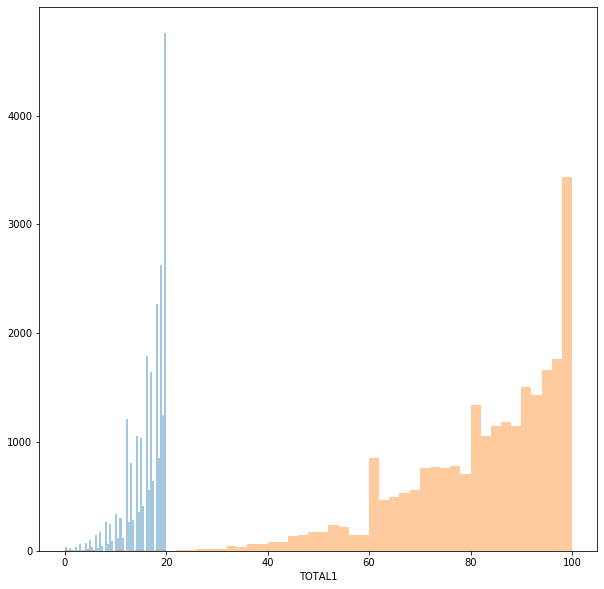

In [198]:
sns.distplot(df["MIDTERM1"], kde=False, bins=50)
sns.distplot(df["TOTAL1"], kde=False, bins=50)

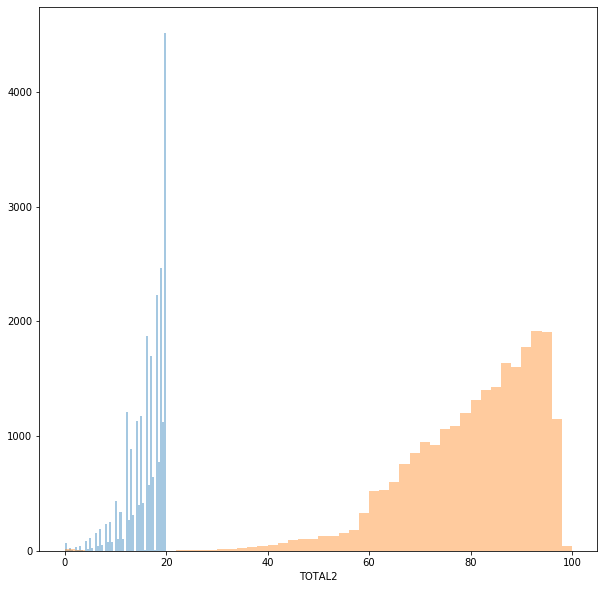

In [197]:
sns.distplot(df["MIDTERM2"], kde=False, bins=50)
sns.distplot(df["TOTAL2"], kde=False, bins=50)

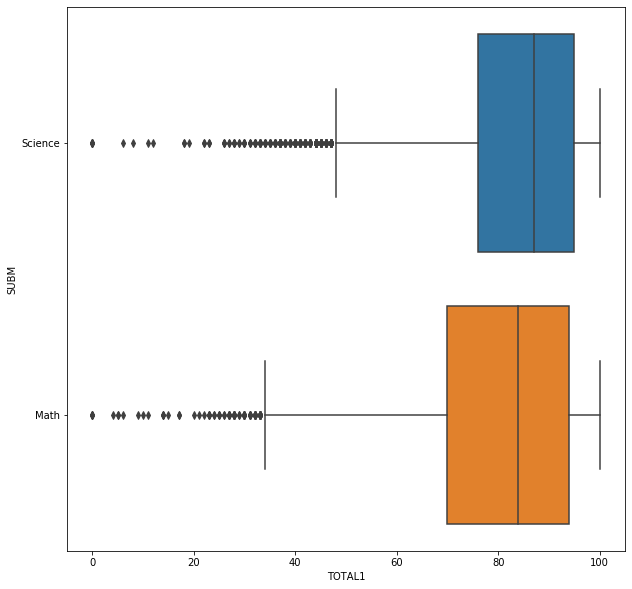

In [235]:
sns.boxplot(df.TOTAL1, df.SUBM, data=df)

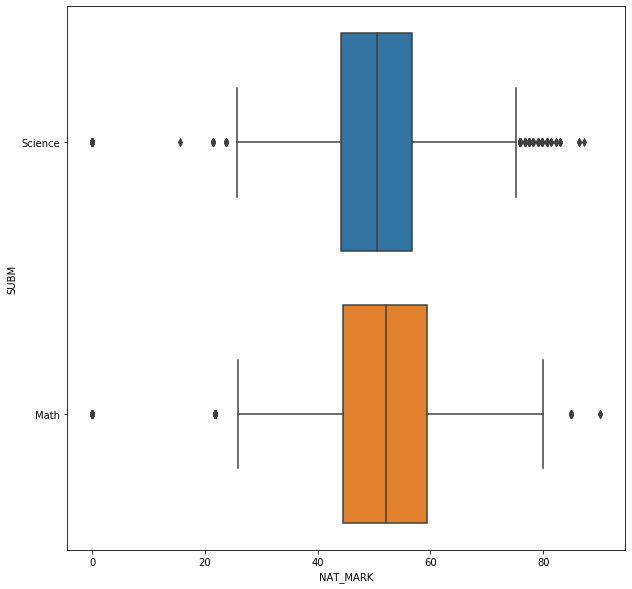

In [236]:
sns.boxplot(df.NAT_MARK, df.SUBM, data=df)

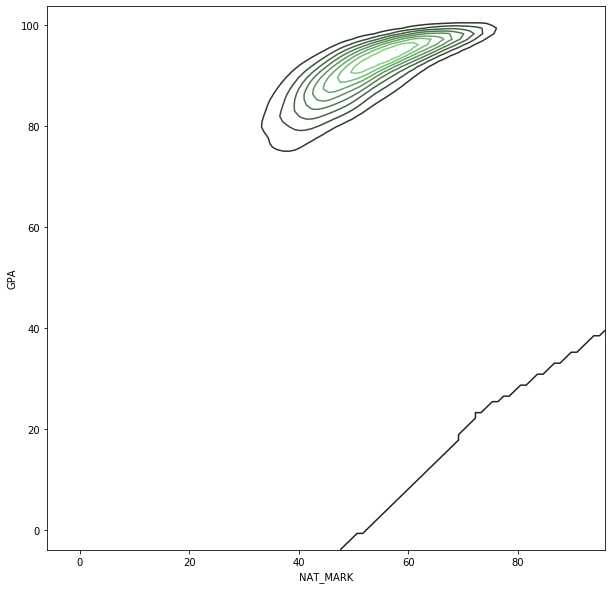

In [237]:
pal = sns.dark_palette("palegreen", as_cmap=True)
sns.kdeplot(df.NAT_MARK, df.GPA, cmap=pal);

In [165]:
df.SUBM.count()

24190

In [170]:
df.groupby('SUBM').size()

SUBM
الرياضيات    12095
العلوم       12095
dtype: int64

In [175]:
df.groupby(["SUBM", "STUFF_SEX"]).size()

SUBM       STUFF_SEX
الرياضيات  مدرسات       6136
           مدرسين       5959
العلوم     مدرسات       6136
           مدرسين       5959
dtype: int64

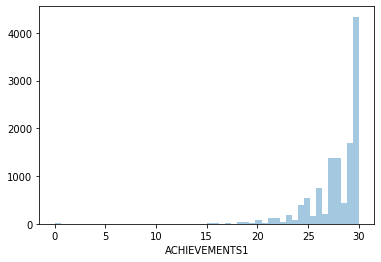

In [158]:
#fig, ax = plt.subplots(1,2)
#sns.distplot(df["ACHIEVEMENTS2"], kde=False, bins=50)
# it looks like a copy and Paste game. 
# change bins from 20 to 50 tddo even more and lok at the trend which is wierdrly copied

## let look how many student got the same Marks in both Achievement test 1 and 2 

## look at the variation of both tests for each student  and plot the graph 
  - graph by different Provinces, teachers_gender, student gender maybe 

## determine the Std for both previous tests and graph 





In [15]:
s = pd.Series([1,2,3, np.nan, 5])
s

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
dtype: float64

In [16]:

s.value_counts(), s.value_counts(dropna = False)

(5.0    1
 3.0    1
 2.0    1
 1.0    1
 dtype: int64, 5.0    1
 NaN    1
 3.0    1
 2.0    1
 1.0    1
 dtype: int64)

In [26]:
df['ACHIEVEMENTS1'].value_counts(dropna=False)

30.0    7491
29.0    3602
28.0    2910
27.0    2163
29.5    1542
        ... 
9.6        1
21.8       1
20.6       1
15.2       1
15.9       1
Name: ACHIEVEMENTS1, Length: 129, dtype: int64

In [30]:
df['ACHIEVEMENTS1'].value_counts(dropna=False, bins=5)

(24.0, 30.0]     22457
(18.0, 24.0]      1553
(12.0, 18.0]       117
(-0.031, 6.0]       32
(6.0, 12.0]         13
Name: ACHIEVEMENTS1, dtype: int64

In [18]:
df.FINAL1.value_counts(dropna=False).head()

50.0    1652
49.0    1077
48.0     934
40.0     885
47.0     863
Name: FINAL1, dtype: int64

In [22]:
df.isnull().sum()

CPR_NO        0
SCH_NM        0
PROV_NM       0
SUBM          0
STUFF_SEX     0
             ..
TOTAL1       16
TOTAL2        0
D_MARK        0
NAT_MARK      0
GPA           0
Length: 16, dtype: int64

In [25]:
df.ACHIEVEMENTS1.value_counts(normalize=True)

30.0    0.309904
29.0    0.149015
28.0    0.120387
27.0    0.089484
29.5    0.063793
          ...   
14.3    0.000041
9.6     0.000041
20.6    0.000041
23.2    0.000041
15.9    0.000041
Name: ACHIEVEMENTS1, Length: 128, dtype: float64

In [51]:
# dataframe containing only the object columns.
obj_df = df.select_dtypes(include=['object'])  #.copy()
obj_df.head()

,SCH_NM,PROV_NM,SUBM,STUFF_SEX
0,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين
1,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين
2,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين
3,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين
4,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين


In [90]:
#clean up  NULL value
df[df.isnull().any(axis=1)]

,CPR_NO,SCH_NM,PROV_NM,SUBM,STUFF_SEX,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
901,70711321,مدرسة أحمد الفاتح الابتدائية الاعدادية للبنين,المحافظة الجنوبية,العلوم,مدرسين,NaN,28.0,NaN,13.0,NaN,26.0,NaN,67,67,45.2,79.222222
4168,60820420,مدرسة الرفاع الشرقي الابتدائية للبنات,المحافظة الجنوبية,العلوم,مدرسات,NaN,29.0,NaN,12.5,NaN,25.0,NaN,67,67,41.1,84.800000
4187,70613516,مدرسة الرفاع الشرقي الابتدائية للبنات,المحافظة الجنوبية,العلوم,مدرسات,NaN,26.5,NaN,6.0,NaN,25.0,NaN,58,58,37.7,74.300000
4234,60820438,مدرسة الرفاع الشرقي الابتدائية للبنات,المحافظة الجنوبية,العلوم,مدرسات,NaN,30.0,NaN,17.0,NaN,43.5,NaN,91,91,59.8,96.000000
5686,70800898,مدرسة الفارابي الإعدادية للبنين,المحافظة الشمالية,العلوم,مدرسين,NaN,0.0,NaN,0.0,82.0,58.0,82.0,58,70,36.5,82.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17781,70800898,مدرسة الفارابي الإعدادية للبنين,المحافظة الشمالية,الرياضيات,مدرسين,NaN,0.0,NaN,0.0,64.0,49.5,64.0,50,57,28.8,82.181818
18375,70116075,مدرسة المستقبل الابتدائية للبنات,المحافظة الجنوبية,الرياضيات,مدرسات,NaN,29.5,NaN,15.5,NaN,37.0,NaN,82,82,46.3,84.222222
20339,71001093,مدرسة رقية الابتدائية للبنات,محافظة المحرق,الرياضيات,مدرسات,NaN,29.0,NaN,20.0,NaN,42.0,NaN,91,91,59.3,95.555556
21378,70922870,مدرسة سمية الابتدائية للبنات,محافظة العاصمة,الرياضيات,مدرسات,NaN,25.0,NaN,14.0,NaN,28.5,NaN,68,68,41.6,81.000000


In [94]:
np.count_nonzero(obj_df.isnull())

NameError: name 'obj_df' is not defined

In [65]:
obj_df.apply(lambda x: sum(x.isnull().values), axis = 1) # For rows

0        1
1        1
2        1
3        1
4        1
        ..
24185    1
24186    1
24187    1
24188    1
24189    1
Length: 24190, dtype: int64

In [11]:
#clean up  NULL value
obj_df[obj_df.isnull().any(axis=1)]

,SCH_NM,PROV_NM,SUBM,STUFF_SEX


In [12]:
obj_df["SCH_NM"].value_counts()

مدرسة الامام الطبرى الابتدائية للبنين            864
مدرسة ابن سينا الابتدائية للبنين                 826
مدرسة مالك بن انس الابتدائية للبنين              804
مدرسة البسيتين الابتدائية للبنين                 626
مدرسة أحمد الفاتح الابتدائية الاعدادية للبنين    524
                                                ... 
مدرسة الجسرة الابتدائية للبنين                    66
مدرسة جو الابتدائية الاعدادية للبنات              66
مدرسة عين جالوت الابتدائية للبنات                 52
مدرسة سكينة بنت الحسين الابتدائية للبنات          36
مدرسة عائشة ام المؤمنين الاعدادية للبنات          34
Name: SCH_NM, Length: 99, dtype: int64

In [13]:
# obj_df = obj_df.fillna({"num_doors": "four"})
# En cas où on veut replacer une valeur par une autre

In [14]:
df_copy=df

In [15]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

In [16]:
df_copy['SCH__NM'] = lb_make.fit_transform(df_copy['SCH_NM'])

In [141]:
df_copy.head()

,CPR_NO,SCH_NM,PROV_NM,SUBM,STUFF_SEX,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA,SCH__NM
0,70913390,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9,0
1,71105956,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5,0
2,70712190,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2,0
3,70207496,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9,0
4,70507953,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2,0


In [17]:
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

In [18]:
#df_Encoded = df[df.columns.difference(['B', 'D'])]

In [19]:

# Encoding the variable
obj_df =obj_df.apply(lambda x: d[x.name].fit_transform(x))

In [20]:
obj_df.tail()

,SCH_NM,PROV_NM,SUBM,STUFF_SEX
24185,98,0,0,1
24186,98,0,0,1
24187,98,0,0,1
24188,98,0,0,1
24189,98,0,0,1


In [21]:
df.drop(['SCH_NM','PROV_NM','SUBM', 'STUFF_SEX'], axis=1)

,CPR_NO,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA,SCH__NM
0,70913390,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.900000,0
1,71105956,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.500000,0
2,70712190,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.200000,0
3,70207496,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.900000,0
4,70507953,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.200000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24185,70304602,30.0,28.0,20.0,18.0,47.0,42.0,97.0,88,93,61.9,94.636364,98
24186,71007423,30.0,25.0,17.0,15.0,17.0,14.5,64.0,55,60,44.5,85.181818,98
24187,70402183,26.0,27.0,12.0,17.0,24.0,22.0,62.0,66,64,44.5,82.727273,98
24188,70803196,28.0,28.0,18.0,18.0,37.0,23.5,83.0,70,77,46.3,89.181818,98


In [22]:
pd.concat([df, obj_df])

/Users/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,ACHIEVEMENTS1,ACHIEVEMENTS2,CPR_NO,D_MARK,FINAL1,FINAL2,GPA,MIDTERM1,MIDTERM2,NAT_MARK,PROV_NM,SCH_NM,SCH__NM,STUFF_SEX,SUBM,TOTAL1,TOTAL2
0,28.0,30.0,70913390.0,85.0,45.0,33.0,92.9,17.0,17.0,53.7,محافظة العاصمة,المعهد الديني الجعفري,0.0,مدرسين,العلوم,90.0,80.0
1,27.0,29.0,71105956.0,83.0,41.5,37.0,89.5,14.0,16.0,49.7,محافظة العاصمة,المعهد الديني الجعفري,0.0,مدرسين,العلوم,83.0,82.0
2,27.0,27.0,70712190.0,74.0,27.5,37.0,86.2,13.0,15.0,52.1,محافظة العاصمة,المعهد الديني الجعفري,0.0,مدرسين,العلوم,68.0,79.0
3,26.0,24.5,70207496.0,77.0,44.0,32.5,89.9,15.0,12.0,52.9,محافظة العاصمة,المعهد الديني الجعفري,0.0,مدرسين,العلوم,85.0,69.0
4,25.0,28.0,70507953.0,76.0,31.5,37.0,86.2,14.0,15.0,52.1,محافظة العاصمة,المعهد الديني الجعفري,0.0,مدرسين,العلوم,71.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98,NaN,1,0,NaN,NaN
24186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98,NaN,1,0,NaN,NaN
24187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98,NaN,1,0,NaN,NaN
24188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98,NaN,1,0,NaN,NaN


In [23]:
df.head()

,CPR_NO,SCH_NM,PROV_NM,SUBM,STUFF_SEX,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA,SCH__NM
0,70913390,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9,0
1,71105956,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5,0
2,70712190,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2,0
3,70207496,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9,0
4,70507953,المعهد الديني الجعفري,محافظة العاصمة,العلوم,مدرسين,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2,0


In [65]:
feature_names=(df.iloc[:,7:18]).columns

In [66]:
feature_names

Index(['ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

- eta: It is also known as the learning rate or the shrinkage factor. It actually shrinks the feature weights to make the boosting process more conservative. The range is 0 to 1. Low eta value means the model is more robust to overfitting.

- gamma: The range is 0 to ∞. Larger the gamma more conservative the algorithm is.
- max_depth: We can specify maximum depth of a tree using this parameter.
- subsample: It is the proportion of rows that the model will randomly select to grow trees.
- colsample_bytree: It is the ratio of variables randomly chosen to build each tree in the model.

# Skewness

*skewness = 0 : normally distributed.

*skewness > 0 : more weight in the left tail of the distribution.

*skewness < 0 : more weight in the right tail of the distribution

In [190]:
df.iloc[6:16].skew()

CPR_NO          -0.171293
ACHIEVEMENTS1    0.218046
ACHIEVEMENTS2   -1.385865
MIDTERM1        -0.358600
MIDTERM2        -0.935082
                   ...   
TOTAL1           0.077588
TOTAL2          -1.227232
D_MARK          -0.558691
NAT_MARK        -0.171779
GPA             -1.128624
Length: 12, dtype: float64

Let us take a very common example of house prices. Suppose we have house values ranging from $100k to $1,000,000 with the average being $500,000.
If the peak of the distribution was left of the average value, portraying a positive skewness in the distribution. It would mean that many houses were being sold for less than the average value, i.e. $500k. This could be for many reasons, but we are not going to interpret those reasons here.
If the peak of the distributed data was right of the average value, that would mean a negative skew. This would mean that the houses were being sold for more than the average value.



In [258]:
(df.columns)

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

In [256]:
df.head()

,CPR_NO,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
0,70913390,المعهد الديني الجعفري,Cap,Science,M,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9
1,71105956,المعهد الديني الجعفري,Cap,Science,M,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5
2,70712190,المعهد الديني الجعفري,Cap,Science,M,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2
3,70207496,المعهد الديني الجعفري,Cap,Science,M,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9
4,70507953,المعهد الديني الجعفري,Cap,Science,M,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24172 entries, 0 to 24189
Data columns (total 16 columns):
CPR_NO            24172 non-null int64
SCH_NM            24172 non-null object
PROV_NM           24172 non-null object
SUBM              24172 non-null object
Teacher_Gender    24172 non-null object
ACHIEVEMENTS1     24172 non-null float64
ACHIEVEMENTS2     24172 non-null float64
MIDTERM1          24172 non-null float64
MIDTERM2          24172 non-null float64
FINAL1            24172 non-null float64
FINAL2            24172 non-null float64
TOTAL1            24172 non-null float64
TOTAL2            24172 non-null int64
D_MARK            24172 non-null int64
NAT_MARK          24172 non-null float64
GPA               24172 non-null float64
dtypes: float64(9), int64(3), object(4)
memory usage: 3.8+ MB


# XGBoost  4. GPA

In [356]:
df.columns

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

In [419]:
# split data into X and y
X = df.iloc[:,5:15]
y = df.iloc[:,15]

In [420]:
X.head()

,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK
0,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7
1,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7
2,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1
3,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9
4,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1


In [421]:
y.head()

0    92.9
1    89.5
2    86.2
3    89.9
4    86.2
Name: GPA, dtype: float64

In [422]:
# Split dataset
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest=train_test_split(X, y, test_size=0.3)

# XGBoost's hyperparameters

In [423]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [424]:
xg_reg.fit(Xtrain,ytrain)


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [425]:
preds = xg_reg.predict(Xtest)

In [426]:
rmse = np.sqrt(mean_squared_error(ytest, preds))
print("RMSE: %f" % (rmse))

RMSE: 31.376791


# k-fold Cross Validation using XGBoost

In [427]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

/Users/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [428]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [429]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,80.617879,0.044406,80.617750,0.096869
1,72.576235,0.040283,72.577843,0.095339
2,65.339900,0.035925,65.341209,0.093741
3,58.826838,0.032364,58.828260,0.092489
4,52.965514,0.028457,52.967107,0.090566


In [430]:
print((cv_results["test-rmse-mean"]).tail(1))

49    2.907892
Name: test-rmse-mean, dtype: float64


In [431]:
preds = xg_reg.predict(Xtest)

In [432]:
print(preds)

[57.6176   61.697945 59.34715  ... 54.685207 63.027077 61.364117]


In [433]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [434]:
#!pip install graphviz


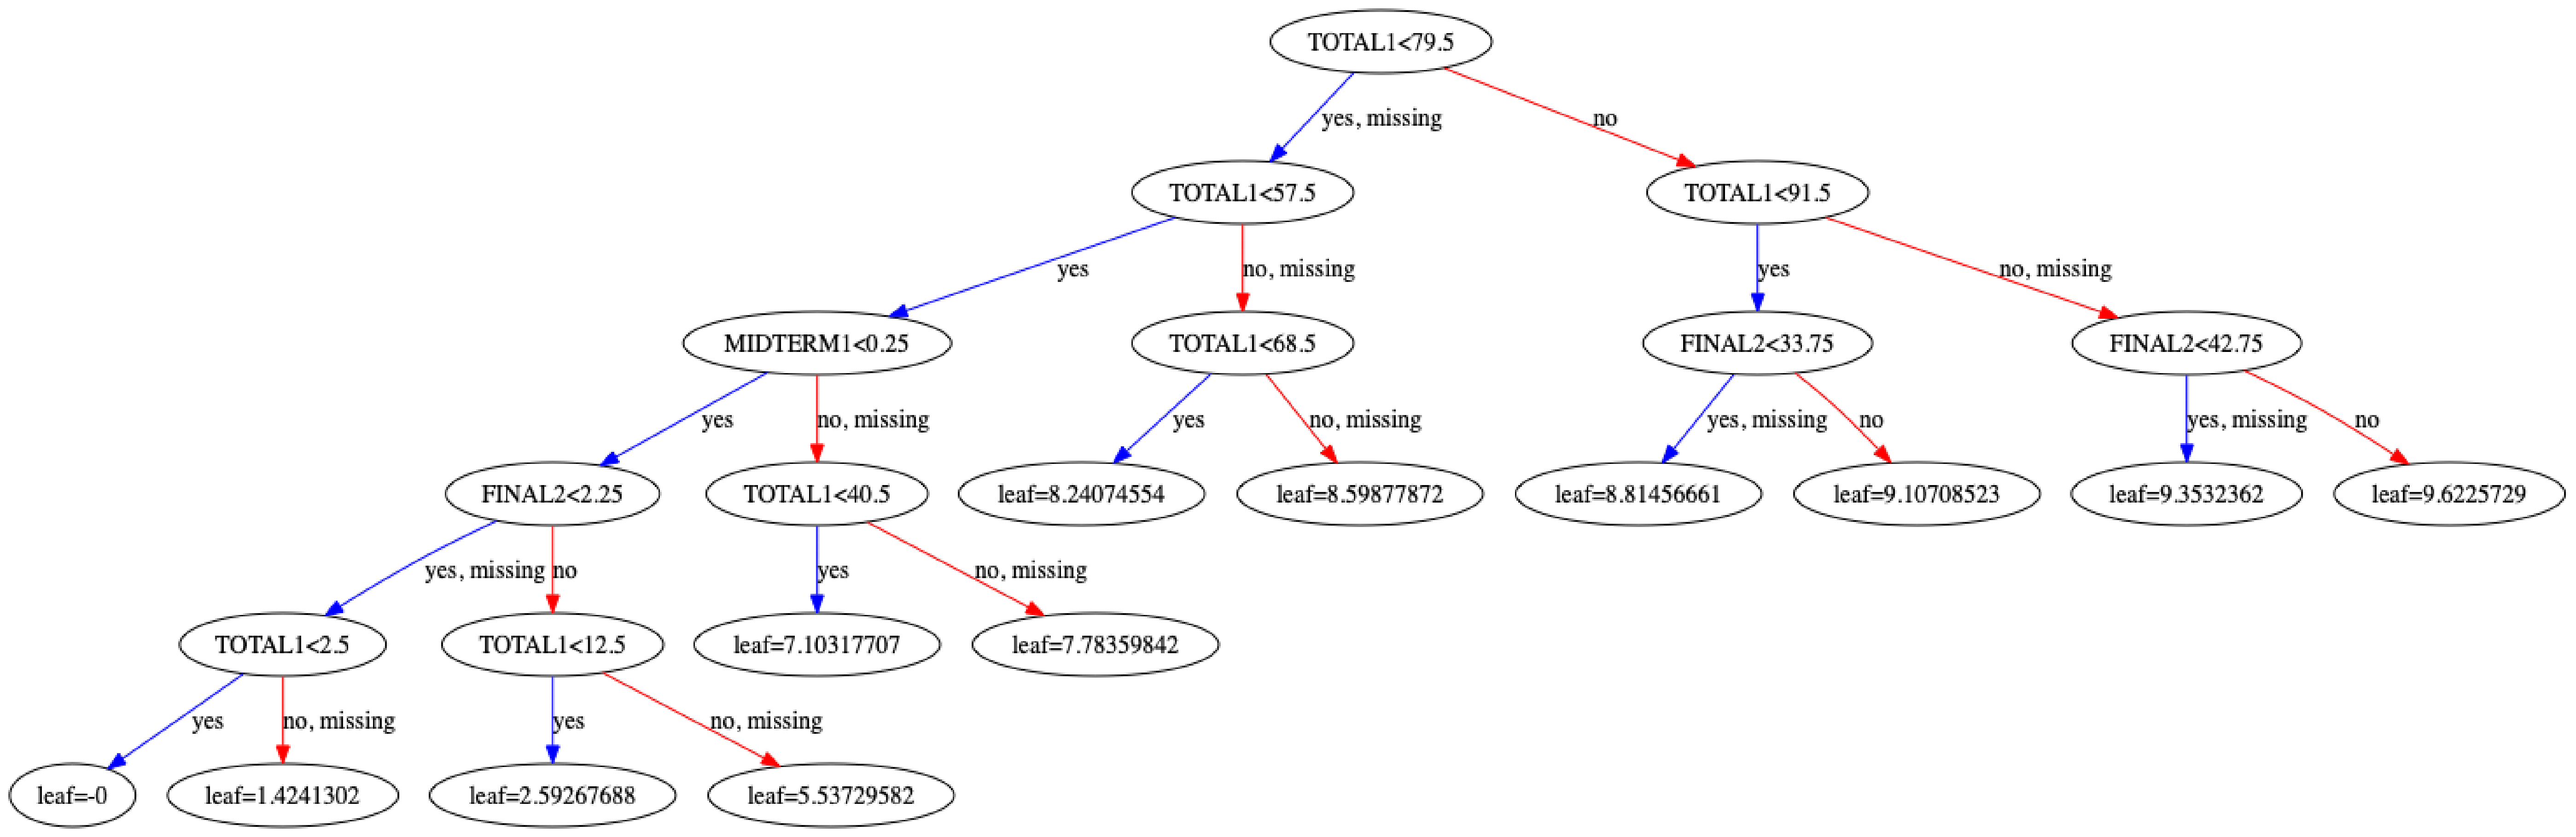

In [435]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [100, 60]


xgb.plot_tree(xg_reg,num_trees=0)
plt.show()

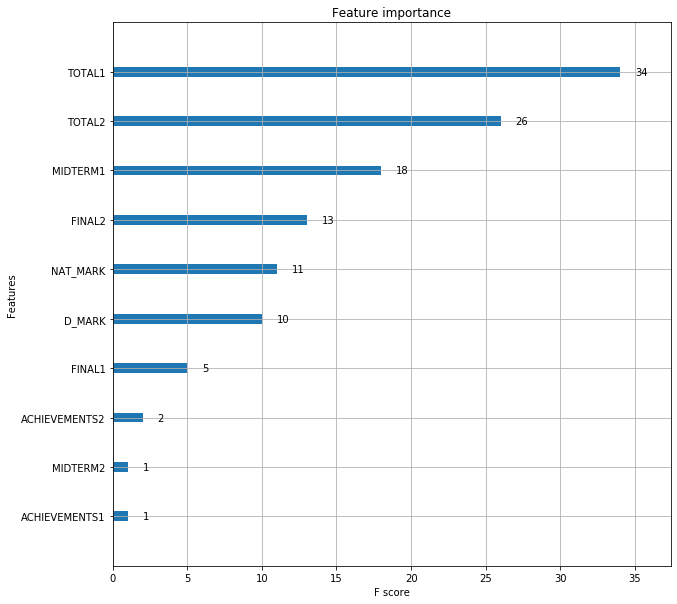

In [436]:
plt.rcParams['figure.figsize'] = [10, 10]
xgb.plot_importance(xg_reg)
plt.show()

# XGBoost 4 NAT_MARK

In [377]:
df.keys()

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

In [386]:
# split data into X and y
X_N = df.loc[:,['ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'GPA']]
y_N = df.loc[:,"NAT_MARK"]

In [387]:
X_N.head()

,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,GPA
0,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,92.9
1,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,89.5
2,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,86.2
3,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,89.9
4,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,86.2


In [388]:
# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_N, y_N, test_size=0.3)

In [450]:
xreg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [451]:
xreg.fit(X_train,y_train)

/Users/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [453]:
preds_N = xreg.predict(X_test)

In [454]:
rmse = np.sqrt(mean_squared_error(y_test, preds_N))
print("RMSE: %f" % (rmse))

RMSE: 19.150134


In [455]:
d_Mtrix = xgb.DMatrix(data=X_N,label=y_N)

/Users/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [456]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

c_res = xgb.cv(dtrain=d_Mtrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [457]:
c_res.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,46.708833,0.050753,46.711166,0.112778
1,42.138597,0.040585,42.143132,0.112620
2,38.033896,0.038084,38.043083,0.106739
3,34.350276,0.035029,34.358001,0.100433
4,31.043496,0.030213,31.055493,0.098627


In [458]:
print((c_res["test-rmse-mean"]).tail(1))

49    6.232798
Name: test-rmse-mean, dtype: float64


In [459]:
preds_N = xreg.predict(X_test)

In [460]:
print(preds_N)

[31.230648 33.11779  33.11779  ... 32.00939  26.212772 31.432396]


In [461]:
xreg = xgb.train(params=params, dtrain=d_Mtrix, num_boost_round=10)

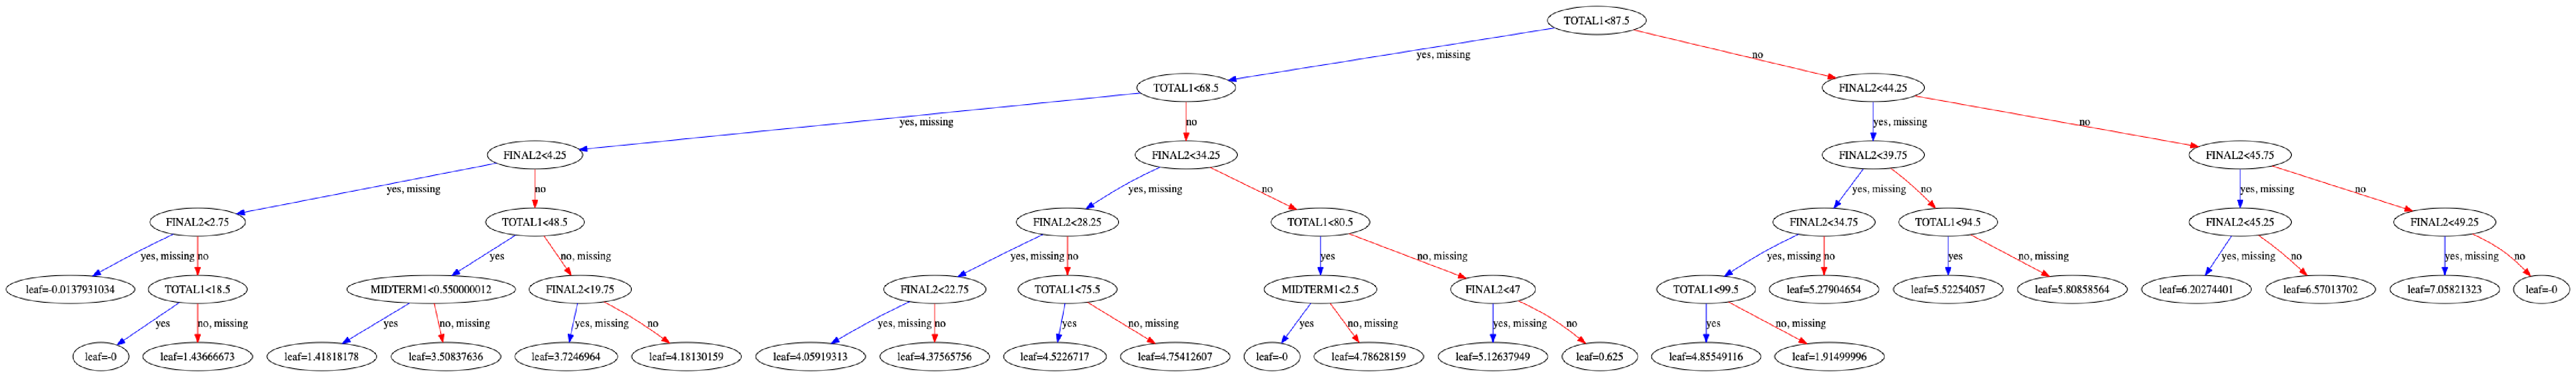

In [463]:
plt.rcParams['figure.figsize'] = [100, 100]


xgb.plot_tree(xreg,num_trees=0)
plt.show()

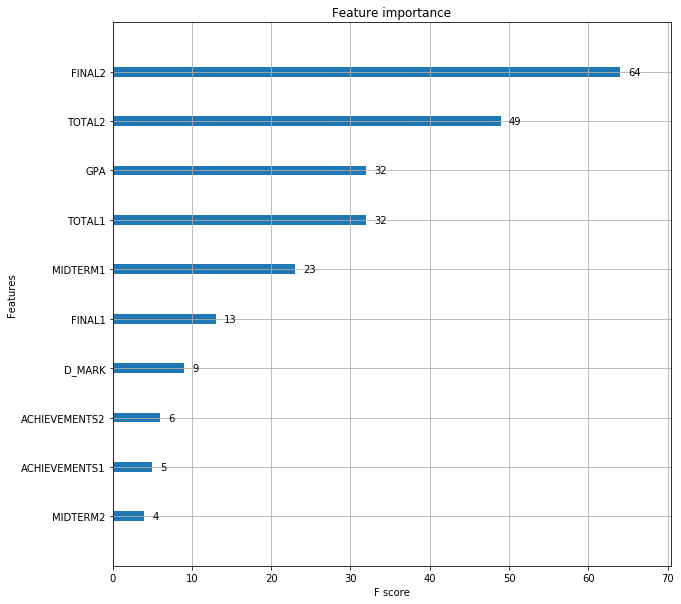

In [464]:
plt.rcParams['figure.figsize'] = [10, 10]
xgb.plot_importance(xreg)
plt.show()